In [1]:
from unicodedata import category
import pandas as pd
card_202007 = pd.read_csv("../card_data/csv/202007.csv")
card_202007 = card_202007[["이용일", "금액", "대분류", "중분류", "소분류"]]
card_202007["중분류1"] = card_202007["중분류"].str.split(" ").str.get(0)
card_202007["이용일"] =pd.to_datetime(card_202007["이용일"].astype(str))
card_202007["년도"] = card_202007["이용일"].dt.year
card_202007["월"] = card_202007["이용일"].dt.month
card_202007["일"] = card_202007["이용일"].dt.day
card_202007["요일"] = card_202007["이용일"].dt.weekday
card_202007["요일_영어"] = card_202007["이용일"].dt.day_name()
weekday_list = ["월", "화", "수", "목", "금", "토", "일"]
card_202007["요일_한글"] = card_202007.apply(lambda x: weekday_list[x["요일"]], axis=1)
card = card_202007[["년도", "월", "일", "요일_한글", "금액", "대분류", "중분류1", "소분류"]]
print(card)

      년도  월   일 요일_한글     금액 대분류 중분류1    소분류
0   2020  7   1     수   1900  식사   카페  카페7그램
1   2020  7   1     수  18100  생활  편의점   GS25
2   2020  7   1     수   -905  기타   할인    NaN
3   2020  7   2     목  20700  식사  햄버거   롯데리아
4   2020  7   3     금   -645  기타   할인    NaN
..   ... ..  ..   ...    ...  ..  ...    ...
73  2020  7  30     목  18000  식사   한식    NaN
74  2020  7  30     목   5500  식사   카페  바나프레소
75  2020  7  31     금  62000  교통   버스    NaN
76  2020  7  31     금   1500  식사   카페  카페7그램
77  2020  7  31     금   7000  유흥    술    NaN

[78 rows x 8 columns]


In [2]:
import matplotlib.pyplot as plt

In [3]:
# win
plt.rc("font", family="Malgun Gothic")

<Axes: >

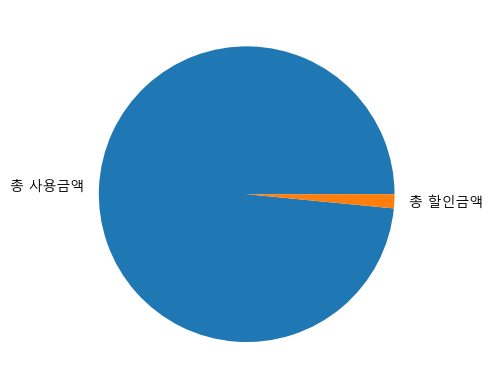

In [4]:
# 1. 사용금액과 할인금액
total_spent = card[card['금액'] > 0]['금액'].sum()
total_discount = card[card['금액'] < 0]['금액'].abs().sum()
# print(f"총 사용금액: {total_spent:,}원")
# print(f"총 할인금액: {total_discount:,}원")
summary = pd.Series({'총 사용금액': total_spent, '총 할인금액': total_discount})
summary.plot.pie(y=summary)

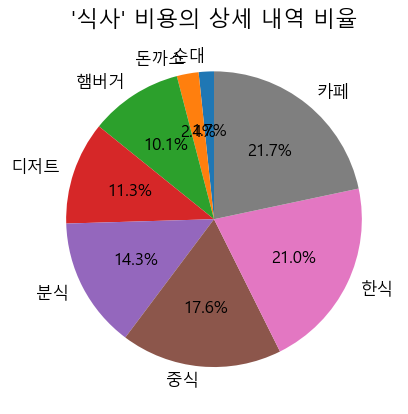

In [5]:
# 2. 식사 데이터에 대한 분류
meals = card[card['대분류'] == '식사']
meal_categories = meals[meals['금액'] > 0].groupby('중분류1')['금액'].sum()
meal_categories = meal_categories.sort_values(ascending=True)

plt.pie(meal_categories, labels=meal_categories.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title("'식사' 비용의 상세 내역 비율", fontsize=16)
plt.show()

Text(0, 0.5, '지출 금액 (원)')

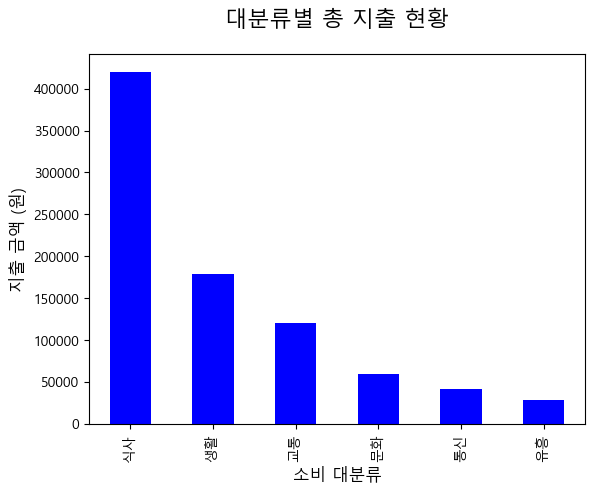

In [6]:
# 3. 대분류별 실제 사용한 금액 합산
spending =  card[card["금액"]>0]
# print(spending)
category_spending = spending.groupby('대분류')['금액'].sum().sort_values(ascending=False)
# print(category_spending)
category_spending.plot(kind='bar', color='b')
plt.title('대분류별 총 지출 현황', fontsize=16, pad=20)
plt.xlabel('소비 대분류', fontsize=12)
plt.ylabel('지출 금액 (원)', fontsize=12)

Text(0.5, 0, '일')

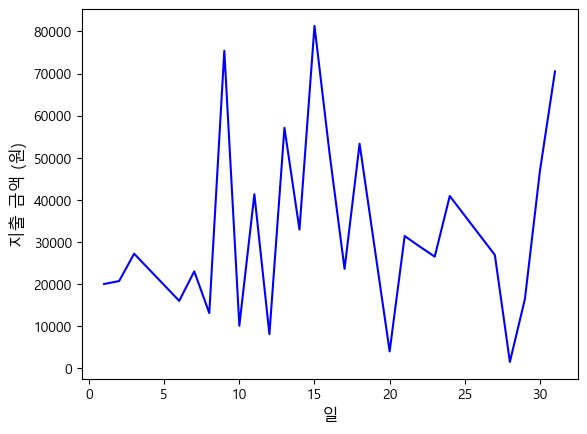

In [7]:
# 4. 일자별 금액 합산
spending =  card[card['금액']>0]
# print(spending)
daily_spending = spending.groupby('일')['금액'].sum().sort_index()
# print(daily_spending)
daily_spending.plot(kind='line', color='blue')
plt.ylabel('지출 금액 (원)', fontsize=12)
plt.xlabel('일', fontsize=12)

Text(0, 0.5, '지출 총액 (원)')

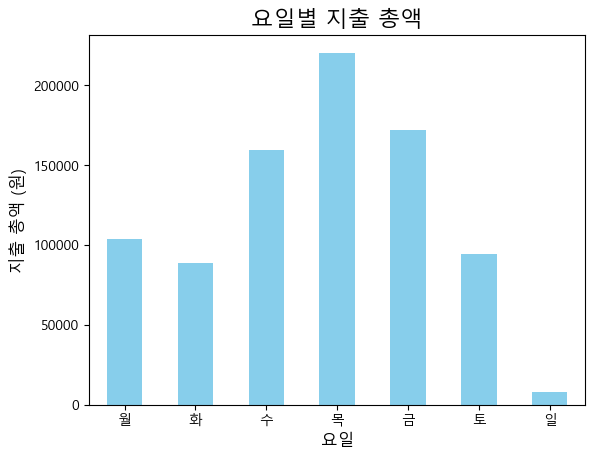

In [10]:
# 5. 요일별 실제 지출내역

spending = card[card['금액'] > 0]
daily_total_spending = spending.groupby('요일_한글')['금액'].sum()

weekday = ['월', '화', '수', '목', '금', '토', '일']
daily_total_spending = daily_total_spending.reindex(weekday)
daily_total_spending.plot(kind='bar', color='skyblue', rot=0)

plt.title('요일별 지출 총액', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('지출 총액 (원)', fontsize=12)